[dataset](https://data.mendeley.com/datasets/skxgmkc64k)  
[weather and power data](https://github.com/danilopsv?tab=overview&from=2023-03-01&to=2023-03-02)

In [27]:
ls ../../local/input/weather-power-data-microgrid/Natal/

Natal_INMET.csv             Natal_handled_dataset.dat
Natal_T_GHI_WS_dataset.dat  Natal_power_dataset.dat
Natal_WRF_dataset.xlsx      Natal_weather_dataset.xlsx


In [2]:
INPUT_PATH = "../../local/input/"
DATA_PATH = "weather-power-data-microgrid/"
NATAL_PATH = "Natal/Natal_"

In [8]:
import numpy as np
import pandas as pd
import os
path = os.path.join(INPUT_PATH, DATA_PATH, NATAL_PATH)
data = pd.read_csv(path + "INMET.CSV", sep=";",header=1, encoding="utf-8", dayfirst=True)
data.columns

Index(['Data', 'Hora (UTC)', 'Temp. Ins. (C)', 'Temp. Max. (C)',
       'Temp. Min. (C)', 'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)',
       'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
       'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)',
       'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)',
       'Radiacao (KJ/m²)', 'Chuva (mm)'],
      dtype='object')

In [9]:
# portugeuse to english mapping
lang_mapping = {
    'Data': 'Date',
    'Hora (UTC)': 'Time (UTC)',
    'Temp. Ins. (C)': 'Instant Temperature (C)', # Celcius
    'Temp. Max. (C)': 'Maximum Temperature (C)',
    'Temp. Min. (C)': 'Minimum Temperature (C)',
    'Umi. Ins. (%)': 'Instant Humidity (%)', # percentage
    'Umi. Max. (%)': 'Maximum Humidity (%)',
    'Umi. Min. (%)': 'Minimum Humidity (%)',
    'Pto Orvalho Ins. (C)': 'Instant Dew Point (C)',
    'Pto Orvalho Max. (C)': 'Maximum Dew Point (C)',
    'Pto Orvalho Min. (C)': 'Minimum Dew Point (C)',
    'Pressao Ins. (hPa)': 'Instant Pressure (hPa)', # hectoPascals
    'Pressao Max. (hPa)': 'Maximum Pressure (hPa)',
    'Pressao Min. (hPa)': 'Minimum Pressure (hPa)',
    'Vel. Vento (m/s)': 'Wind Speed (m/s)', # meters per second
    'Dir. Vento (m/s)': 'Wind Direction (m/s)',
    'Raj. Vento (m/s)': 'Wind Gust (m/s)',
    'Radiacao (KJ/m²)': 'Solar Radiation (KJ/m2)', # KiloJoules per square meter
    'Chuva (mm)': 'Rainfall (mm)' # millimeters
}
data.rename(columns=lang_mapping, inplace=True)

In [5]:
data["Time (UTC)"] = (data["Time (UTC)"] // 100).replace(np.nan, -1).astype(int)
data["Time (UTC)"] = data["Time (UTC)"].astype(str)
data[['Date', "Time (UTC)"]].fillna('', inplace=True)
data["Date"]

<ipython-input-5-516ce41ffcb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Date', "Time (UTC)"]].fillna('', inplace=True)


0       08/01/2020
1       08/01/2020
2       08/01/2020
3       08/01/2020
4       08/01/2020
           ...    
9115           NaN
9116           NaN
9117           NaN
9118           NaN
9119           NaN
Name: Date, Length: 9120, dtype: object

In [6]:
data['Time (UTC)']

0        0
1        1
2        2
3        3
4        4
        ..
9115    -1
9116    -1
9117    -1
9118    -1
9119    -1
Name: Time (UTC), Length: 9120, dtype: object

In [10]:
# convert dates to datetime format
# set 
data["Time (UTC)"] = (data["Time (UTC)"] // 100).replace(np.nan, -1).astype(int)
data["Time (UTC)"] = data["Time (UTC)"].astype(str)
data[['Date', "Time (UTC)"]].fillna('', inplace=True)
data["datetime"] = pd.to_datetime(data['Date'] + " " + data['Time (UTC)'], errors='raise', dayfirst=True, format='%d/%m/%Y %H')

<ipython-input-10-5f9f7972b029>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Date', "Time (UTC)"]].fillna('', inplace=True)


In [11]:
data_processed = data.drop(columns=['datetime', 'Time (UTC)', 'Date']).apply(lambda x: x.str.replace(",",".").astype(float))
data_processed['datetime'] = data['datetime']
data_processed

,Instant Temperature (C),Maximum Temperature (C),Minimum Temperature (C),Instant Humidity (%),Maximum Humidity (%),Minimum Humidity (%),Instant Dew Point (C),Maximum Dew Point (C),Minimum Dew Point (C),Instant Pressure (hPa),Maximum Pressure (hPa),Minimum Pressure (hPa),Wind Speed (m/s),Wind Direction (m/s),Wind Gust (m/s),Solar Radiation (KJ/m2),Rainfall (mm),datetime
0,27.7,27.9,27.7,80.0,80.0,80.0,24.0,24.1,23.9,1007.0,1007.1,1006.7,2.9,120.0,5.8,NaN,0.0,2020-01-08 00:00:00
1,27.7,27.8,27.7,81.0,81.0,79.0,24.0,24.1,23.8,1007.2,1007.3,1007.0,3.3,117.0,5.9,NaN,0.0,2020-01-08 01:00:00
2,27.7,27.8,27.6,80.0,81.0,79.0,24.0,24.1,23.8,1007.0,1007.3,1007.0,3.5,131.0,6.0,NaN,0.0,2020-01-08 02:00:00
3,27.5,27.7,27.5,81.0,82.0,80.0,24.1,24.1,23.9,1006.3,1007.0,1006.3,3.2,127.0,5.9,NaN,0.0,2020-01-08 03:00:00
4,23.9,27.6,23.9,88.0,88.0,76.0,21.8,24.1,21.8,1005.6,1006.3,1005.6,5.2,127.0,10.0,NaN,1.2,2020-01-08 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
9116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
9117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
9118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


<AxesSubplot:xlabel='datetime'>

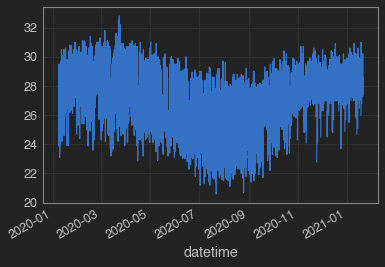

In [12]:
data_processed.set_index('datetime')['Instant Temperature (C)'].plot()

In [13]:
weather_data = pd.read_excel(path + "weather_dataset.xlsx", header=1)
weather_data_cols = weather_data.iloc[:,3:].columns
weather_data = weather_data.iloc[3:,:].reset_index(drop=True)
weather_data['datetime'] = pd.to_datetime(weather_data.iloc[:,0].astype(str) + " " + weather_data.iloc[:,1].astype(str) + ":00", errors='raise', format='%Y-%m-%d %H')
weather_data.head()

,Unnamed: 0,UTC,Local,Inst,Máx,Mín,Forecasted (WRF),Inst.1,Máx.1,Mín.1,...,Speed\n(m/s),Direction (°),Forecasted speed (WRF),Forecasted direction\n(WRF),Max speed (m/s),(kJ/m²),(W/m²),Forecasted (W/m²),(mm),datetime
0,2020-01-08,3,0.0,27.5,27.7,27.5,26.400435,81.0,82.0,80.0,...,3.2,127.0,3.346324,109.942926,5.9,-1.34,-0.372222,0.0,0.0,2020-01-08 03:00:00
1,2020-01-08,4,1.0,23.9,27.6,23.9,26.083073,88.0,88.0,76.0,...,5.2,127.0,3.410113,96.251034,10.0,-1.45,-0.402778,0.0,1.2,2020-01-08 04:00:00
2,2020-01-08,5,2.0,25.4,25.4,23.4,25.727319,93.0,94.0,88.0,...,2.4,113.0,3.416929,103.316974,10.0,0.42,0.116667,0.0,25.2,2020-01-08 05:00:00
3,2020-01-08,6,3.0,26.0,26.2,25.4,25.865391,90.0,93.0,90.0,...,1.8,140.0,3.468087,107.678594,5.1,2518.00,699.444444,0.0,0.2,2020-01-08 06:00:00
4,2020-01-08,7,4.0,26.4,26.4,25.7,25.553801,88.0,91.0,88.0,...,2.1,123.0,3.370525,115.746108,4.1,1359.00,377.500000,0.0,0.0,2020-01-08 07:00:00


In [14]:
cols = ['Inst', 'Máx', 'Mín', 'Forecasted (WRF)',
       'Inst.1', 'Máx.1', 'Mín.1', 'Inst.2', 'Máx.2', 'Mín.2', 'Inst.3',
       'Máx.3', 'Mín.3', 'Speed\n(m/s)', 'Direction (°)',
       'Forecasted speed (WRF)', 'Forecasted direction\n(WRF)',
       'Max speed (m/s)', '(kJ/m²)', '(W/m²)', 'Forecasted (W/m²)', '(mm)']

In [15]:
len(cols)

22

In [16]:
weather_cols_eng = ['Instant Temp. (C)',
 'Max Temp. (C)',
 'Min Temp (C)',
 'Forecasted Temp. (C) (WRF) ',
 'Instant Humidity (%)',
 'Max Humidity (%)',
 'Min Humidity (%)',
 'Instant Dew Point (C)',
 'Max Dew Point (C)',
 'Min Dew Point (C)',
 'Instant Pressure (hPA)',
 'Max Pressure (hPa)',
 'Min Pressure (hPa)',
 'Wind Speed (m/s)',
 'Wind Direction (°)',
 'Forecasted Wind Speed (m/s) (WRF)',
 'Forecasted Wind Direction (°) (WRF)',
 'Max Wind Speed (Wind Gust) (m/s)',
 'Solar Radiation (kJ/m²)',
 'Solar Radiation (W/m²)',
 'Forecasted Solar Radiation (W/m²)',
 'Rainfall (mm)']

22

In [18]:
weather_data_handled = pd.read_csv(path + "handled_dataset.dat", delimiter='\t', header=None)
weather_data_handled.iloc[:, 3:-1]

,3,4,5,6,7,8,9,10,11,12,...,15,16,17,18,19,20,21,22,23,24
0,27.5,27.7,27.5,26.4,81.0,82.0,80.0,24.1,24.1,23.9,...,1006.3,3.2,359.0,3.3,109.9,5.9,-1.3,0.0,0.0,0.0
1,23.9,27.6,23.9,26.1,88.0,88.0,76.0,21.8,24.1,21.8,...,1005.6,5.2,359.0,3.4,96.3,10.0,-1.5,0.0,0.0,1.2
2,25.4,25.4,23.4,25.7,93.0,94.0,88.0,24.1,24.2,21.6,...,1005.3,2.4,359.0,3.4,103.3,10.0,0.4,0.0,0.0,25.2
3,26.0,26.2,25.4,25.9,90.0,93.0,90.0,24.2,24.5,24.2,...,1005.2,1.8,359.0,3.5,107.7,5.1,2518.0,0.0,0.0,0.2
4,26.4,26.4,25.7,25.6,88.0,91.0,88.0,24.3,24.4,24.0,...,1005.4,2.1,359.0,3.4,115.7,4.1,1359.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,28.6,29.3,28.0,27.8,75.0,75.0,71.0,23.7,24.0,22.8,...,1003.9,4.2,359.0,6.0,90.3,9.2,1813.2,503.7,469.9,0.0
9089,27.6,28.7,27.6,27.6,75.0,77.0,73.0,22.8,23.7,22.5,...,1004.0,4.2,359.0,5.9,78.3,8.7,785.2,218.1,199.2,0.0
9090,27.3,27.6,27.2,26.8,78.0,78.0,75.0,23.0,23.1,22.8,...,1004.3,3.8,359.0,5.6,82.5,7.0,54.8,15.2,15.8,0.0
9091,27.3,27.6,27.2,26.8,78.0,78.0,76.0,23.1,23.2,22.9,...,1005.0,3.4,359.0,5.1,91.0,6.7,0.0,0.0,0.0,0.0


In [24]:
weather_df = pd.concat([weather_data['datetime'], weather_data_handled.iloc[:,3:-1]], axis=1).set_index('datetime')
weather_df = weather_df.rename(columns = dict(zip(weather_df.columns, weather_cols_eng)))
weather_df

,Instant Temp. (C),Max Temp. (C),Min Temp (C),Forecasted Temp. (C) (WRF),Instant Humidity (%),Max Humidity (%),Min Humidity (%),Instant Dew Point (C),Max Dew Point (C),Min Dew Point (C),...,Min Pressure (hPa),Wind Speed (m/s),Wind Direction (°),Forecasted Wind Speed (m/s) (WRF),Forecasted Wind Direction (°) (WRF),Max Wind Speed (Wind Gust) (m/s),Solar Radiation (kJ/m²),Solar Radiation (W/m²),Forecasted Solar Radiation (W/m²),Rainfall (mm)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-08 03:00:00,27.5,27.7,27.5,26.4,81.0,82.0,80.0,24.1,24.1,23.9,...,1006.3,3.2,359.0,3.3,109.9,5.9,-1.3,0.0,0.0,0.0
2020-01-08 04:00:00,23.9,27.6,23.9,26.1,88.0,88.0,76.0,21.8,24.1,21.8,...,1005.6,5.2,359.0,3.4,96.3,10.0,-1.5,0.0,0.0,1.2
2020-01-08 05:00:00,25.4,25.4,23.4,25.7,93.0,94.0,88.0,24.1,24.2,21.6,...,1005.3,2.4,359.0,3.4,103.3,10.0,0.4,0.0,0.0,25.2
2020-01-08 06:00:00,26.0,26.2,25.4,25.9,90.0,93.0,90.0,24.2,24.5,24.2,...,1005.2,1.8,359.0,3.5,107.7,5.1,2518.0,0.0,0.0,0.2
2020-01-08 07:00:00,26.4,26.4,25.7,25.6,88.0,91.0,88.0,24.3,24.4,24.0,...,1005.4,2.1,359.0,3.4,115.7,4.1,1359.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-20 19:00:00,28.6,29.3,28.0,27.8,75.0,75.0,71.0,23.7,24.0,22.8,...,1003.9,4.2,359.0,6.0,90.3,9.2,1813.2,503.7,469.9,0.0
2021-01-20 20:00:00,27.6,28.7,27.6,27.6,75.0,77.0,73.0,22.8,23.7,22.5,...,1004.0,4.2,359.0,5.9,78.3,8.7,785.2,218.1,199.2,0.0
2021-01-20 21:00:00,27.3,27.6,27.2,26.8,78.0,78.0,75.0,23.0,23.1,22.8,...,1004.3,3.8,359.0,5.6,82.5,7.0,54.8,15.2,15.8,0.0


<AxesSubplot:xlabel='datetime'>

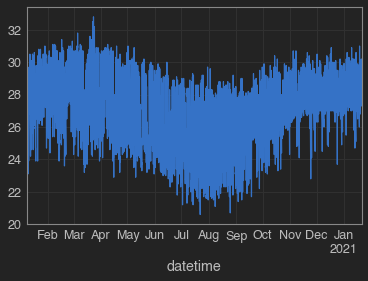

In [25]:
weather_df['Instant Temp. (C)'].plot()

<AxesSubplot:xlabel='datetime'>

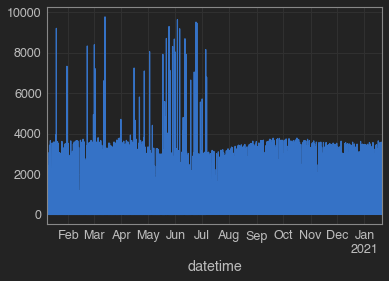

In [29]:
weather_df['Solar Radiation (kJ/m²)'].plot()

<AxesSubplot:xlabel='datetime'>

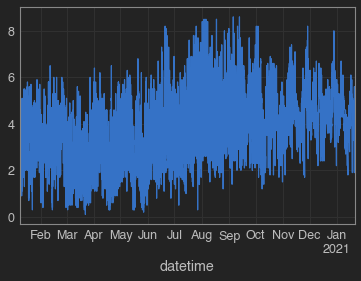

In [30]:
weather_df['Wind Speed (m/s)'].plot()